<h1><center> <font color = 'green'>Final Project</font></center></h1>

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
%matplotlib inline

In [126]:
df = pd.read_csv('reviews.csv') # Play Store app reviews dataset
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


## Data Insightes

In [127]:
df.shape

(12495, 12)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       12495 non-null  object
 1   ratings       12495 non-null  int64 
 2   tokenizedCol  12495 non-null  object
dtypes: int64(1), object(2)
memory usage: 293.0+ KB


In [129]:
df.isna().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2162
at                         0
replyContent            6677
repliedAt               6677
sortOrder                  0
appId                      0
dtype: int64

In [130]:
df = df[['content','score']].copy()

In [131]:
def ratingsChanger(x):
    if x >= 4:
        return 2
    elif x > 2:
        return 1
    else:
        return 0

## Cleaning the Text

In [132]:
df['ratings'] = df['score'].apply(ratingsChanger)

In [133]:
df['content'] = df['content'].str.lower()

In [134]:
df

,content,score,ratings
0,i cannot open the app anymore,1,0
1,i have been begging for a refund from this app...,1,0
2,very costly for the premium version (approx in...,1,0
3,"used to keep me organized, but all the 2020 up...",1,0
4,dan birthday oct 28,1,0
...,...,...,...
12490,"i really like the planner, it helps me achieve...",5,2
12491,😁****😁,5,2
12492,very useful apps. you must try it,5,2
12493,would pay for this if there were even more add...,5,2


<AxesSubplot:xlabel='ratings', ylabel='count'>

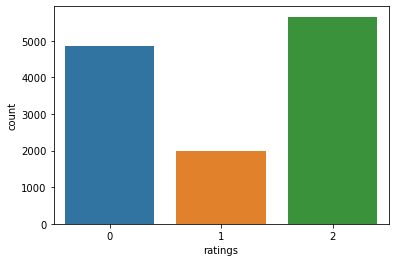

In [135]:
sns.countplot(x = df['ratings'])

In [136]:
df.drop(labels = 'score',axis = 1,inplace = True)

In [137]:
df

,content,ratings
0,i cannot open the app anymore,0
1,i have been begging for a refund from this app...,0
2,very costly for the premium version (approx in...,0
3,"used to keep me organized, but all the 2020 up...",0
4,dan birthday oct 28,0
...,...,...
12490,"i really like the planner, it helps me achieve...",2
12491,😁****😁,2
12492,very useful apps. you must try it,2
12493,would pay for this if there were even more add...,2


## Feature engineering

In [138]:
import re

In [139]:
df['content'] = df['content'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '  ',x))  # Removing Special Characters

In [140]:
df

,content,ratings
0,i cannot open the app anymore,0
1,i have been begging for a refund from this app...,0
2,very costly for the premium version approx i...,0
3,used to keep me organized but all the ...,0
4,dan birthday oct,0
...,...,...
12490,i really like the planner it helps me achiev...,2
12491,,2
12492,very useful apps you must try it,2
12493,would pay for this if there were even more add...,2


In [141]:
df['content'] = df['content'].apply(lambda x: re.sub(r'(https?://)?(www\.)?\w+\.\w+', '',x)) # Removing Hyperlinks

In [142]:
df['content'] = df['content'].apply(lambda x: re.sub(r'\s+', ' ', x)) # Removing two or more spaces

In [143]:
df

,content,ratings
0,i cannot open the app anymore,0
1,i have been begging for a refund from this app...,0
2,very costly for the premium version approx ind...,0
3,used to keep me organized but all the updates ...,0
4,dan birthday oct,0
...,...,...
12490,i really like the planner it helps me achieve ...,2
12491,,2
12492,very useful apps you must try it,2
12493,would pay for this if there were even more add...,2


## Tokenization and Stopword 

In [144]:
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
df['tokenizedCol'] = df['content'].apply(lambda x : word_tokenize(x))

In [146]:
df['tokenizedCol']

0                   [i, can, not, open, the, app, anymore]
1        [i, have, been, begging, for, a, refund, from,...
2        [very, costly, for, the, premium, version, app...
3        [used, to, keep, me, organized, but, all, the,...
4                                     [dan, birthday, oct]
                               ...                        
12490    [i, really, like, the, planner, it, helps, me,...
12491                                                   []
12492             [very, useful, apps, you, must, try, it]
12493    [would, pay, for, this, if, there, were, even,...
12494                                        [sooow, good]
Name: tokenizedCol, Length: 12495, dtype: object

In [147]:
stopWords = stopwords.words('english')

In [148]:
def stopWordRemover(paraList):
    listOfWords = []
    for x in paraList:
        if x not in stopWords:
            listOfWords.append(x)
    return listOfWords

In [149]:
df['tokenizedCol'] = df['tokenizedCol'].apply(stopWordRemover)

In [150]:
df

,content,ratings,tokenizedCol
0,i cannot open the app anymore,0,"[open, app, anymore]"
1,i have been begging for a refund from this app...,0,"[begging, refund, app, month, nobody, replying]"
2,very costly for the premium version approx ind...,0,"[costly, premium, version, approx, indian, rup..."
3,used to keep me organized but all the updates ...,0,"[used, keep, organized, updates, made, mess, t..."
4,dan birthday oct,0,"[dan, birthday, oct]"
...,...,...,...
12490,i really like the planner it helps me achieve ...,2,"[really, like, planner, helps, achieve, tasks,..."
12491,,2,[]
12492,very useful apps you must try it,2,"[useful, apps, must, try]"
12493,would pay for this if there were even more add...,2,"[would, pay, even, additions, updates, absolut..."


## Stemming

In [151]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [152]:
def stemmer(lst):
    ans = []
    for x in lst:
        def res(x): return porter.stem(x)
        ans.append(res(x))
    return ans

In [153]:
df['tokenizedCol'] = df['tokenizedCol'].apply(stemmer)

In [154]:
df

,content,ratings,tokenizedCol
0,i cannot open the app anymore,0,"[open, app, anymor]"
1,i have been begging for a refund from this app...,0,"[beg, refund, app, month, nobodi, repli]"
2,very costly for the premium version approx ind...,0,"[costli, premium, version, approx, indian, rup..."
3,used to keep me organized but all the updates ...,0,"[use, keep, organ, updat, made, mess, thing, c..."
4,dan birthday oct,0,"[dan, birthday, oct]"
...,...,...,...
12490,i really like the planner it helps me achieve ...,2,"[realli, like, planner, help, achiev, task, go..."
12491,,2,[]
12492,very useful apps you must try it,2,"[use, app, must, tri]"
12493,would pay for this if there were even more add...,2,"[would, pay, even, addit, updat, absolut, love..."


In [155]:
def FinalReviewMaker(stemmed_list):
    empty = ""
    for i in stemmed_list:
        empty = empty + i + " "
    return empty

In [156]:
df['tokenizedCol'] = df['tokenizedCol'].apply(FinalReviewMaker)

In [157]:
df

,content,ratings,tokenizedCol
0,i cannot open the app anymore,0,open app anymor
1,i have been begging for a refund from this app...,0,beg refund app month nobodi repli
2,very costly for the premium version approx ind...,0,costli premium version approx indian rupe per ...
3,used to keep me organized but all the updates ...,0,use keep organ updat made mess thing cudn u le...
4,dan birthday oct,0,dan birthday oct
...,...,...,...
12490,i really like the planner it helps me achieve ...,2,realli like planner help achiev task goal aven...
12491,,2,
12492,very useful apps you must try it,2,use app must tri
12493,would pay for this if there were even more add...,2,would pay even addit updat absolut love wish w...


## Bag of Words

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

In [159]:
obj = CountVectorizer()
obj.fit(df['tokenizedCol'])
X = obj.transform(df['tokenizedCol'])

## Train and Test Split

In [160]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,df['ratings'],train_size = 0.8, random_state=42)

## Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
model = LogisticRegression( max_iter = 2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [189]:
model.score(X_test,y_test)

0.687875150060024

<AxesSubplot:ylabel='count'>

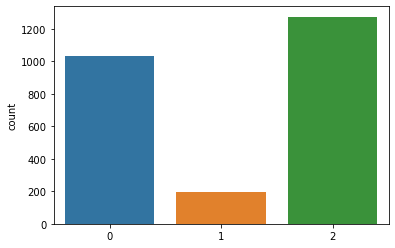

In [170]:
sns.countplot(x =  model.predict(X_test))

## Naïve Bayes

In [180]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

### Bernoulli Naïve Bayes

In [181]:
obj1 = BernoulliNB()
obj1.fit(X_train,y_train)

BernoulliNB()

In [188]:
obj1.score(X_test,y_test)

0.6210484193677471

<AxesSubplot:ylabel='count'>

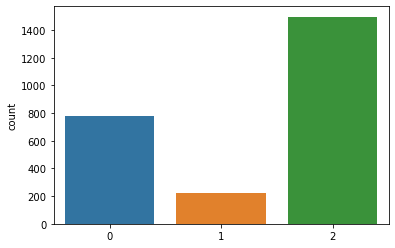

In [182]:
sns.countplot(x =  obj1.predict(X_test))

### Multinomial Naïve Bayes

In [184]:
obj2 = MultinomialNB()
obj2.fit(X_train,y_train)

MultinomialNB()

In [185]:
obj2.score(X_test,y_test)

0.6966786714685874

<AxesSubplot:ylabel='count'>

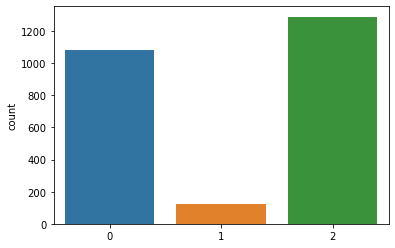

In [186]:
sns.countplot(x =  obj2.predict(X_test))

 <font color='green'><b>After applying three different classification algorithms, we can say that Multinomial Naïve Bayes works best for the given data with 69.67% accuracy. Logistic Regression is the second best algorithm with 68.79% accuracy.</b></font> 